In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.drop(['gender', 'PhoneService', 'TotalCharges'], axis=1)
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [ ]:
y = df["Churn"]
enc = LabelEncoder()
y = enc.fit_transform(y)
df["Churn"]=enc.fit_transform(df["Churn"])
data = df.iloc[:, 1:-1]

In [ ]:
c = (data.dtypes == "object")
catcol = list(c[c].index)
c

SeniorCitizen       False
Partner              True
Dependents           True
tenure              False
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
dtype: bool

In [ ]:
for col in catcol:
  data[col] = enc.fit_transform(data[col])
data

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85
1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95
2,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85
3,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,1,1,72,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,1,1,11,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,0,4,2,1,0,0,0,0,0,0,0,1,3,74.40


In [ ]:
X = data
target = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.05, random_state = 42)


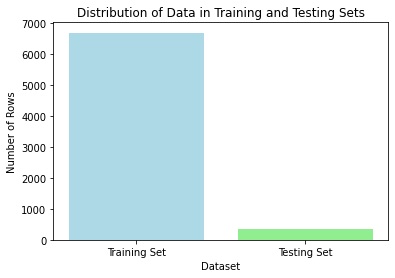

In [ ]:
train_size = len(X_train)
test_size = len(X_test)


# Create a column chart showing the distribution of data in the training and testing sets
labels = ['Training Set', 'Testing Set']
sizes = [train_size, test_size]
colors = ['lightblue', 'lightgreen']

plt.bar(labels, sizes, color=colors)

plt.title('Distribution of Data in Training and Testing Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Rows')

plt.show()

In [ ]:
pd.DataFrame(X_train)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
381,0,0,0,1,0,0,0,2,0,0,0,0,0,0,3,50.65
6586,0,1,1,45,2,2,1,1,1,1,1,1,2,1,1,24.65
4375,0,0,0,66,2,1,2,2,2,2,2,2,1,1,0,114.30
3240,0,1,0,54,2,1,2,2,0,0,2,2,1,0,0,106.55
1599,0,1,1,70,0,0,0,2,2,2,2,2,2,1,0,80.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,1,0,1,2,0,0,0,2,2,0,1,2,95.00
5191,0,1,1,23,2,0,2,2,2,2,2,2,2,1,1,91.10
5226,0,1,1,12,0,2,1,1,1,1,1,1,0,1,2,21.15
5390,1,0,0,12,2,1,0,0,2,0,2,2,0,1,2,99.45


In [ ]:
pd.DataFrame(X_test)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
185,0,1,0,1,1,0,0,0,0,0,0,0,0,1,2,24.80
2715,0,0,0,41,2,2,1,1,1,1,1,1,0,1,0,25.25
3825,0,1,1,52,0,2,1,1,1,1,1,1,2,0,3,19.35
1807,0,0,0,1,0,1,0,0,2,0,0,0,0,0,2,76.35
132,0,0,0,67,0,0,0,0,0,2,0,0,2,0,0,50.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,0,1,0,64,0,1,2,0,0,0,0,0,0,1,3,73.55
2851,0,1,1,64,2,0,2,2,2,2,2,2,2,1,3,90.60
4951,1,1,0,29,2,1,0,0,0,0,0,2,0,1,2,84.30
3319,0,0,0,2,0,0,2,0,0,0,2,2,0,1,2,70.75


In [ ]:
pd.DataFrame(y_train)

,Churn
381,1
6586,0
4375,0
3240,1
1599,0
...,...
3772,1
5191,0
5226,0
5390,1


In [ ]:
pd.DataFrame(y_test)

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6485,0
2851,0
4951,0
3319,1


In [ ]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
output=clf.predict(X_test)
output
enc = LabelEncoder()
output = enc.fit_transform(output)

In [ ]:
DecModel = DecisionTreeClassifier()
DecModel.fit(X_train, y_train)
DecPreds = DecModel.predict(X_test)

In [ ]:
pd.DataFrame(DecPreds)

,0
0,0
1,0
2,0
3,1
4,0
...,...
348,0
349,0
350,0
351,0


In [ ]:
pd.DataFrame(output)

,0
0,1
1,0
2,0
3,1
4,0
...,...
348,0
349,0
350,1
351,0


In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=200,  random_state=42)

In [ ]:
MLP.fit(X_train,y_train)

MLPClassifier(random_state=42)

In [ ]:
y_pred=MLP.predict(X_test)

In [ ]:
pd.DataFrame(y_pred)

,0
0,1
1,0
2,0
3,1
4,0
...,...
348,0
349,0
350,1
351,0


In [ ]:
confusion_matrix(y_test, DecPreds)

array([[207,  57],
       [ 43,  46]])

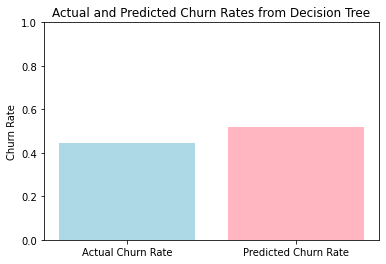

In [ ]:
cm = confusion_matrix(y_test, DecPreds)
actual_churn_rate1 = cm[1, 1] / (cm[1, 1] + cm[0, 1])
predicted_churn_rate1 = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Create a bar chart of the predicted and actual churn rates
labels2 = ['Actual Churn Rate', 'Predicted Churn Rate']
values2 = [actual_churn_rate1, predicted_churn_rate1]
colors2 = ['lightblue', 'lightpink']

plt.bar(labels2, values2, color=colors2)
plt.title('Actual and Predicted Churn Rates from Decision Tree')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()


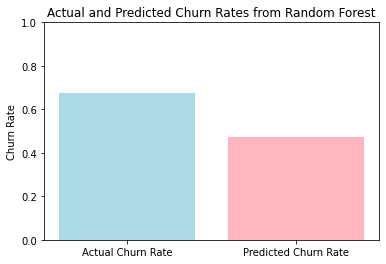

In [ ]:
cm2 = confusion_matrix(y_test, output)
actual_churn_rate = cm2[1, 1] / (cm2[1, 1] + cm2[0, 1])
predicted_churn_rate = cm2[1, 1] / (cm2[1, 1] + cm2[1, 0])

# Create a bar chart of the predicted and actual churn rates
labels2 = ['Actual Churn Rate', 'Predicted Churn Rate']
values2 = [actual_churn_rate, predicted_churn_rate]
colors2 = ['lightblue', 'lightpink']

plt.bar(labels2, values2, color=colors2)
plt.title('Actual and Predicted Churn Rates from Random Forest')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

In [ ]:
confusion_matrix(y_test, output)

array([[244,  20],
       [ 47,  42]])

In [ ]:
dt_importances = DecModel.feature_importances_
rf_importances = clf.feature_importances_


In [ ]:
weights = abs(MLP.coefs_[0])
mlp_importances = weights.sum(axis=1)

# Normalize the feature importances
mlp_importances /= mlp_importances.sum()

print(mlp_importances)

[0.08772125 0.05887559 0.06316381 0.04763389 0.06930014 0.07850039
 0.0627797  0.05194567 0.04853621 0.05636539 0.0638136  0.06535353
 0.08594775 0.05882023 0.06083718 0.04040567]


In [ ]:
DecModel.feature_importances_

array([0.0217272 , 0.02776382, 0.02076318, 0.19102666, 0.01856209,
       0.02822798, 0.04666781, 0.01977289, 0.01805649, 0.01523889,
       0.01223131, 0.01787645, 0.17035585, 0.02212371, 0.05845405,
       0.3111516 ])

In [ ]:
clf.feature_importances_

array([0.02443463, 0.02852481, 0.02393443, 0.23710216, 0.02812284,
       0.0258802 , 0.05422364, 0.03017189, 0.02419015, 0.04632702,
       0.02076371, 0.02018781, 0.08549242, 0.02850579, 0.06092879,
       0.2612097 ])

In [ ]:
mlp_importances

array([0.08772125, 0.05887559, 0.06316381, 0.04763389, 0.06930014,
       0.07850039, 0.0627797 , 0.05194567, 0.04853621, 0.05636539,
       0.0638136 , 0.06535353, 0.08594775, 0.05882023, 0.06083718,
       0.04040567])

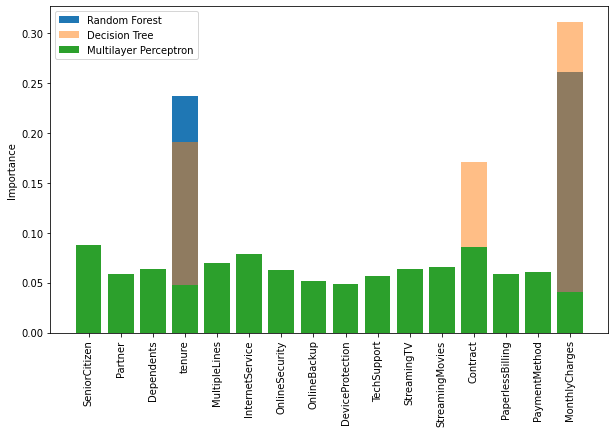

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(X.columns, rf_importances, label='Random Forest')
plt.bar(X.columns, dt_importances, alpha=0.5, label='Decision Tree')
plt.bar(X.columns, mlp_importances, alpha=1, label='Multilayer Perceptron')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.legend()
plt.show()

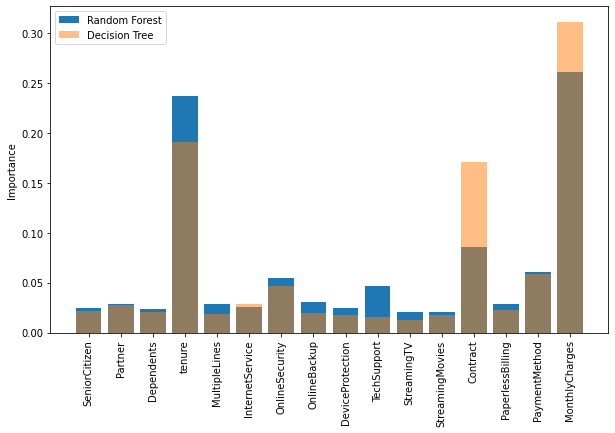

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(X.columns, rf_importances, label='Random Forest')
plt.bar(X.columns, dt_importances, alpha=0.5, label='Decision Tree')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.legend()
plt.show()

# Potential customer

In [ ]:
potential_churned_dtc = df.loc[df['Churn'] == 1][['customerID']][DecModel.predict(X[df['Churn'] == 1]) == 1]
potential_churned_rfc = df.loc[df['Churn'] == 1][['customerID']][clf.predict(X[df['Churn'] == 1]) == 1]
potential_churned_mlp = df.loc[df['Churn'] == 1][['customerID']][MLP.predict(X[df['Churn'] == 1]) == 1]

In [ ]:
potential_customers = pd.merge(potential_churned_dtc, potential_churned_rfc, on='customerID', how='inner')
potential_customers = pd.merge(potential_customers, potential_churned_mlp, on='customerID', how='inner')
potential_customers.columns = ['Customer ID']

In [ ]:
potential_customers

,Customer ID
0,9237-HQITU
1,9305-CDSKC
2,7892-POOKP
3,8779-QRDMV
4,6467-CHFZW
...,...
974,1980-KXVPM
975,0723-DRCLG
976,1122-JWTJW
977,6894-LFHLY


In [ ]:
potential_customers.to_csv('potential_customers.csv', index=False)